In [1]:
import pandas as pd
import pickle

#### all_note_data에서 중복값 정리

In [7]:
all_notes = pd.read_csv('../data/all_note_data.csv')
notes_info = all_notes.iloc[:,1:]  # rows : 973
notes_info[notes_info['note'] == 'chinotto']

,note,category_idx,category_name,season
211,chinotto,11,beverages,"[0, 1, 2, 3]"
212,chinotto,1,citrus_smells,"[0, 1]"


In [27]:
all_notes.head()

,Unnamed: 0,note,category_idx,category_name,season
0,0,absinthe,11,beverages,"[0, 1, 2, 3]"
1,1,acacia,3,flowers,"[0, 1, 2, 3]"
2,2,acai berry,2,fruits_vegetables_and_nuts,"[0, 2]"
3,3,acerola,2,fruits_vegetables_and_nuts,"[0, 2]"
4,4,acerola blossom,3,flowers,"[0, 1, 2, 3]"


In [8]:
duplicate = notes_info[notes_info.duplicated(subset=['note'])]

In [35]:
duplicate.index

Int64Index([212, 250, 260, 612], dtype='int64')

In [16]:
notes_info[notes_info['note'] == 'chinotto']

,note,category_idx,category_name,season
211,chinotto,11,beverages,"[0, 1, 2, 3]"
212,chinotto,1,citrus_smells,"[0, 1]"


In [19]:
notes_info = notes_info.drop(211)
notes_info[notes_info['note'] == 'chinotto']

,note,category_idx,category_name,season
212,chinotto,1,citrus_smells,"[0, 1]"


In [10]:
notes_info[notes_info['note'] == 'cognac']

,note,category_idx,category_name,season
249,cognac,11,beverages,"[0, 1, 2, 3]"
250,cognac,11,beverages,"[0, 1, 2, 3]"


In [15]:
notes_info = notes_info.drop(249)
notes_info[notes_info['note'] == 'cognac']

,note,category_idx,category_name,season
250,cognac,11,beverages,"[0, 1, 2, 3]"


In [20]:
notes_info[notes_info['note'] == 'cork']

,note,category_idx,category_name,season
259,cork,8,woods_and_mosses,"[2, 3]"
260,cork,12,netural_and_synthetic_popular_and_weird,"[0, 1, 2, 3]"


In [23]:
#notes_info = notes_info.drop(260)
notes_info[notes_info['note'] == 'cork']

,note,category_idx,category_name,season
259,cork,8,woods_and_mosses,"[2, 3]"


In [24]:
notes_info[notes_info['note'] == 'molasses']

,note,category_idx,category_name,season
611,molasses,12,netural_and_synthetic_popular_and_weird,"[0, 1, 2, 3]"
612,molasses,7,sweets_and_gourmand_smells,[3]


In [26]:
#notes_info = notes_info.drop(611)
notes_info[notes_info['note'] == 'molasses']

,note,category_idx,category_name,season
612,molasses,7,sweets_and_gourmand_smells,[3]


In [28]:
notes_info.to_csv('../data/all_note_data.csv', index=False)

#### 그에 따른 notes의 pk값 수정

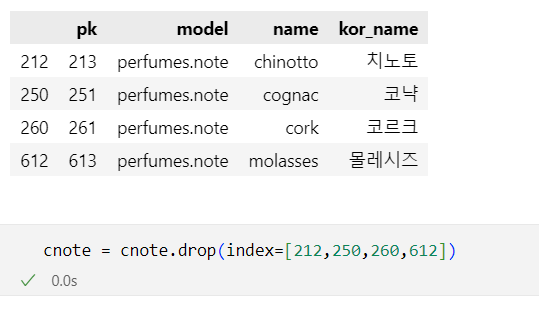

* chinotto : [212, 213] --> 212
* cognac : [250, 251] --> 250
* cork : [260, 261] --> 260
* molasses : [612, 613] --> 612

In [30]:
with open('../data/notes.pkl', 'rb') as f:
    notes_dicts = pickle.load(f)

In [59]:
df = pd.read_csv('../data/1st treatment_perfume.csv')
df.head(2)

,Unnamed: 0,pk,model,name,thumbnail,gender,top_notes,heart_notes,base_notes,seasons,availability,brand,categories,price
0,0,26120003,perfumes.perfume,X-Centric,26120003.jpg,1,"[178, 224, 229, 292, 388, 395, 646]","[358, 545, 785]","[26, 193, 624, 692]","[1, 2, 3, 4]",True,895,[3],21.0
1,1,26120006,perfumes.perfume,GFT,26120006.jpg,1,"[96, 515, 562]","[292, 512, 886]","[193, 624, 649]",[3],True,1170,"[3, 5, 8]",62.0


In [57]:
# df['top_notes'][0] : '[178, 224, 229, 292, 388, 395, 646]'
notes_list = ['top_notes', 'heart_notes', 'base_notes']
for notes in notes_list:
    for j in range(len(df)):
        df[i][j] = df[i][j].replace('213', '212')
        df[i][j] = df[i][j].replace('251', '250')
        df[i][j] = df[i][j].replace('613', '612')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_1448\1680947815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i][j] = df2[i][j].replace('178', '20000')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1448\1680947815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i][j] = df2[i][j].replace('224', '250000')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_1448\1680947815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [60]:
df.index[df['top_notes'].str.contains('20000')].tolist()

[]